In [1]:
import numpy as np

In [2]:
data = np.loadtxt('../data/channel_Re590.txt',skiprows=8)


In [3]:
data.shape[0]

59

In [4]:
tke = data[:, 0]
eps = data[:, 1]
grad_u_flat = data[:, 2:11]
stresses_flat = data[:, 11:]

# Reshape grad_u and stresses to num_points X 3 X 3 arrays
num_points = data.shape[0]
grad_u = np.zeros((num_points, 3, 3))
stresses = np.zeros((num_points, 3, 3))
for i in range(3):
    for j in range(3):
        grad_u[:, i, j] = grad_u_flat[:, i*3+j]
        stresses[:, i, j] = stresses_flat[:, i*3+j]


In [5]:
grad_u[0]

array([[ 2.0821e-04,  4.8370e+02, -9.2901e-01],
       [-3.5325e-07, -3.2383e-04,  2.3919e-05],
       [ 4.6207e-08,  1.5474e-04,  1.4803e-06]])

In [6]:
cap = 7
eps = np.maximum(eps, 1e-8)
tke_eps = tke / eps

Sij = np.zeros((num_points, 3, 3))
Rij = np.zeros((num_points, 3, 3))

In [7]:

for i in range(num_points):
    Sij[i, :, :] = 0.5 * (grad_u[i, :, :] + np.transpose(grad_u[i, :, :]))
    Rij[i, :, :] = 0.5 * (grad_u[i, :, :] - np.transpose(grad_u[i, :, :]))


In [8]:
Sij[0]

array([[ 2.08210000e-04,  2.41850000e+02, -4.64504977e-01],
       [ 2.41850000e+02, -3.23830000e-04,  8.93295000e-05],
       [-4.64504977e-01,  8.93295000e-05,  1.48030000e-06]])

In [9]:
Rij[0]

array([[ 0.00000000e+00,  2.41850000e+02, -4.64505023e-01],
       [-2.41850000e+02,  0.00000000e+00, -6.54105000e-05],
       [ 4.64505023e-01,  6.54105000e-05,  0.00000000e+00]])

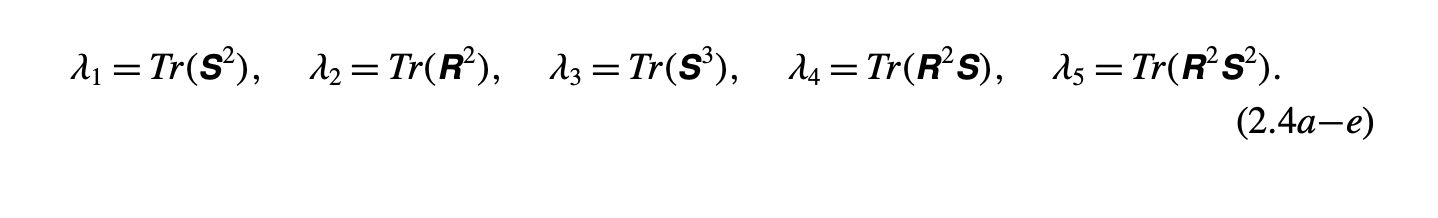

In [10]:
num_points = Sij.shape[0]
num_invariants = 5
invariants = np.zeros((num_points, num_invariants))
for i in range(num_points):
    invariants[i, 0] = np.trace(np.dot(Sij[i, :, :], Sij[i, :, :]))
    invariants[i, 1] = np.trace(np.dot(Rij[i, :, :], Rij[i, :, :]))
    invariants[i, 2] = np.trace(np.dot(Sij[i, :, :], np.dot(Sij[i, :, :], Sij[i, :, :])))
    invariants[i, 3] = np.trace(np.dot(Rij[i, :, :], np.dot(Rij[i, :, :], Sij[i, :, :])))
    invariants[i, 4] = np.trace(np.dot(np.dot(Rij[i, :, :], Rij[i, :, :]), np.dot(Sij[i, :, :], Sij[i, :, :])))

In [16]:
np.dot(Sij[0, :, :], Sij[0, :, :])

array([[ 5.84916382e+04, -2.80041910e-02,  2.15069374e-02],
       [-2.80041910e-02,  5.84914224e+04, -1.12340529e+02],
       [ 2.15069374e-02, -1.12340529e+02,  2.15764882e-01]])

In [49]:
num_tensor_basis = 10
T = np.zeros((num_points, num_tensor_basis, 3, 3))
for i in range(num_points):
    sij = Sij[i, :, :]
    rij = Rij[i, :, :]
    T[i, 0, :, :] = sij
    T[i, 1, :, :] = np.dot(sij, rij) - np.dot(rij, sij)
    T[i, 2, :, :] = np.dot(sij, sij) - 1./3.*np.eye(3)*np.trace(np.dot(sij, sij))
    T[i, 3, :, :] = np.dot(rij, rij) - 1./3.*np.eye(3)*np.trace(np.dot(rij, rij))
    T[i, 4, :, :] = np.dot(rij, np.dot(sij, sij)) - np.dot(np.dot(sij, sij), rij)
    T[i, 5, :, :] = np.dot(rij, np.dot(rij, sij)) \
                    + np.dot(sij, np.dot(rij, rij)) \
                    - 2./3.*np.eye(3)*np.trace(np.dot(sij, np.dot(rij, rij)))
    T[i, 6, :, :] = np.dot(np.dot(rij, sij), np.dot(rij, rij)) - np.dot(np.dot(rij, rij), np.dot(sij, rij))
    T[i, 7, :, :] = np.dot(np.dot(sij, rij), np.dot(sij, sij)) - np.dot(np.dot(sij, sij), np.dot(rij, sij))
    T[i, 8, :, :] = np.dot(np.dot(rij, rij), np.dot(sij, sij)) \
                    + np.dot(np.dot(sij, sij), np.dot(rij, rij)) \
                    - 2./3.*np.eye(3)*np.trace(np.dot(np.dot(sij, sij), np.dot(rij, rij)))
    T[i, 9, :, :] = np.dot(np.dot(rij, np.dot(sij, sij)), np.dot(rij, rij)) \
                    - np.dot(np.dot(rij, np.dot(rij, sij)), np.dot(sij, rij))
    # Enforce zero trace for anisotropy
    for j in range(num_tensor_basis):
        T[i, j, :, :] = T[i, j, :, :] - 1./3.*np.eye(3)*np.trace(T[i, j, :, :])

In [47]:
# T[0,0]

In [48]:
# np.trace(T[0,0])